## Task 2 To Explore Supervised Machine Learning

#### In this notebook I am using Python Scikit-Learn library for machine learning to implement simple linear regression functions.

### Simple Linear Regression

#### In this regression task I will be predicting the percentage of marks that a student is expected to score based upon the number of hours studied. This is a simple linear regression tas involving just two variables.
#### Author: Sai Koushik

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Data Visualization

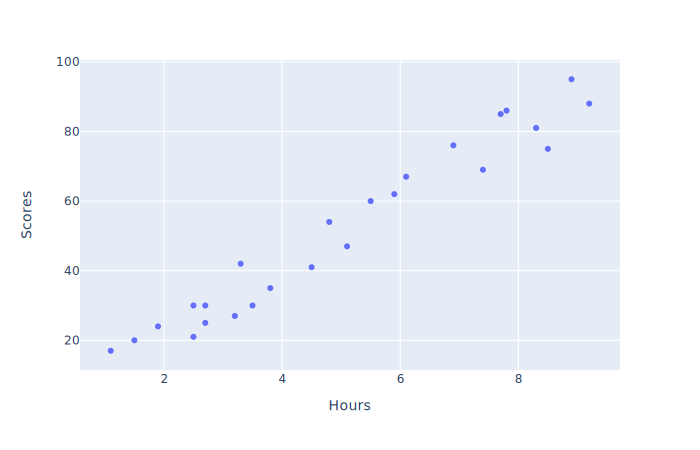

In [7]:
fig1=px.scatter(data,x="Hours",y="Scores")
fig1.show('svg')

#### From the above graph we can say that as number of hours studied increases marks are also increasing hence we can say there exists positive correlation between the two variables

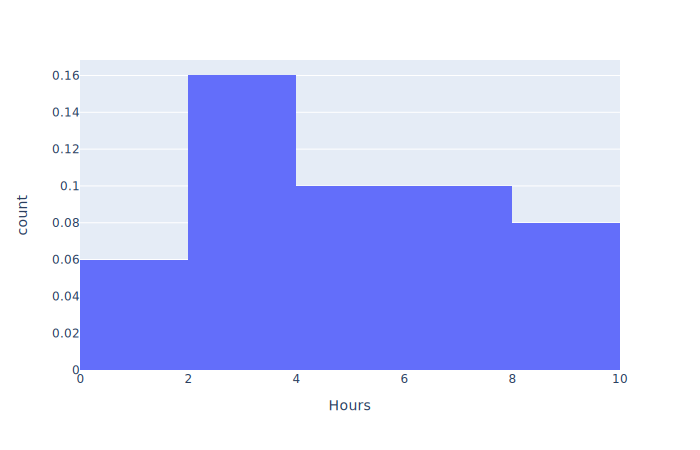

In [8]:
fig2 = px.histogram(data, x="Hours", histnorm='probability density')
fig2.show('svg')

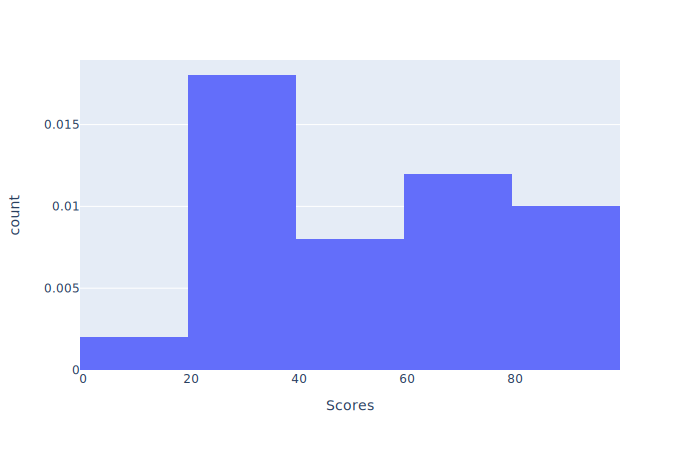

In [9]:
fig3 = px.histogram(data, x="Scores", histnorm='probability density')
fig3.show('svg')

### Preparing the data
#### The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [10]:
X = data.drop('Scores',axis=1)
Y = data['Scores']

#### Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [13]:
X_train

,Hours
9,2.7
13,3.3
1,5.1
22,3.8
5,1.5
2,3.2
12,4.5
15,8.9
3,8.5
4,3.5


In [14]:
y_train

9     25
13    42
1     47
22    35
5     20
2     27
12    41
15    95
3     75
4     30
20    30
17    24
21    54
18    67
24    86
7     60
10    85
14    17
19    69
6     88
Name: Scores, dtype: int64

### Training the Algorithm
#### We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [15]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
model_linear_regression = lr.fit(X_train, y_train) 

### Plotting Regression Line

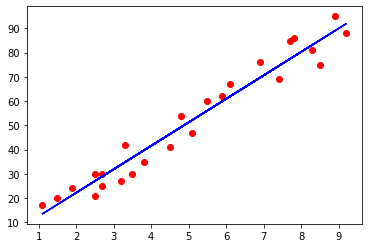

In [16]:
# Plotting the regression line
line = model_linear_regression.coef_*X + model_linear_regression.intercept_

# Plotting for the test data
plt.scatter(X, Y, color='red')
plt.plot(X, line, color='blue');
plt.show()

### Making Predictions
#### Now that we have trained our algorithm, it's time to make some predictions.

In [17]:
y_pred = model_linear_regression.predict(X_test)

In [18]:
y_pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [19]:
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_compare 

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


In [20]:
# You can also test with your own data
hours = 9.25
own_pred = model_linear_regression.predict([[hours]])
print("No of Hours studied = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours studied = 9.25
Predicted Score = 92.38611528261494


### Evaluating the model
#### The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [21]:
from sklearn.metrics import mean_absolute_error,r2_score   
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred))
print('r2 score:',r2_score(y_test, y_pred))

Mean Absolute Error: 3.9207511902099244
r2 score: 0.9678055545167994


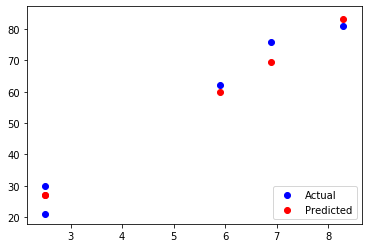

In [22]:
plt.scatter(X_test, y_test, color='blue')
plt.scatter(X_test,y_pred, color='red')
plt.legend(["Actual", "Predicted"], loc ="lower right")
plt.show()